In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Theory

To convert to ppm: https://doi.org/10.1016/j.vibspec.2008.01.004

Note: Because the OHabsorption peak shifts slightly depending on the OH concentration, the optimal method is to search for the exact T_min, instead measuring the T_min at a fixed wavelength.

<IPython.core.display.Javascript object>


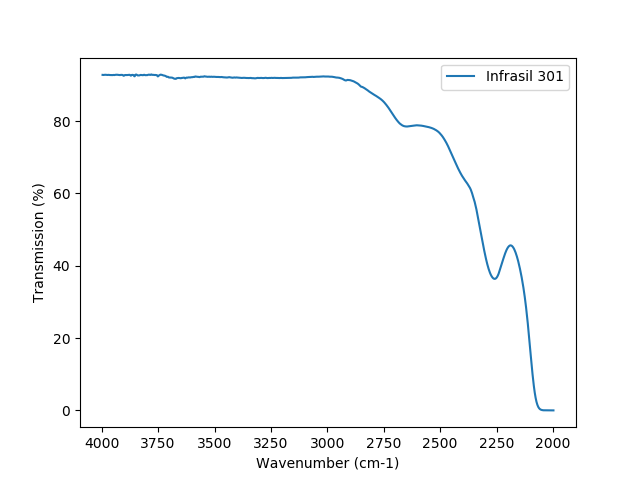

(4096.1572955000001, 1898.2192345000001)

In [11]:
fig, ax1 = plt.subplots()

path = './FTIR/'
f = [x for x in os.listdir(path) if '.DPT' in x and 'Infra' in x][0]
result = np.genfromtxt(path + f)
f = f.split('.')[0]
# Wavenumber (cm-1)
x = result[:, 0]
# Transmission (%)
y = result[:, 1] * 100

ax1.plot(x, y, label=f)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
# ax1.set_ylim(0, 100)
# ax1.set_xlim(3400, 4000)
ax1.set_xlim(ax1.get_xlim()[::-1])

In [12]:
# Trim data for only where the absorption band lies
ind = np.where(x>3300)
x = x[ind]
y = y[ind]

<IPython.core.display.Javascript object>


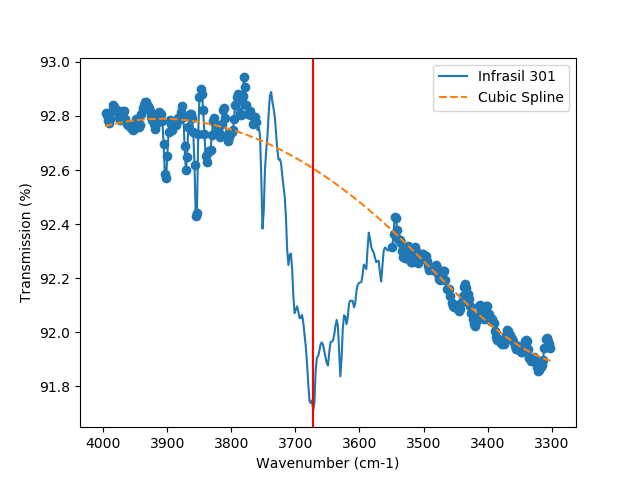

In [41]:
from scipy import interpolate

# Select data eitherside OH absorption to fit the spline to
ind1 = np.where(x<3550)
ind2 = np.where(x>3760)
ind = np.append(ind1, ind2)
x1 = x[ind]
y1 = y[ind]

# Evaluate spline
tck = interpolate.splrep(x1, y1, k=3, s=1)
ynew = interpolate.splev(x, tck, der=0)

# Plot
fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.plot(x, ynew, '--', label='Cubic Spline')
ax1.scatter(x1, y1)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])

# Search for peak T_min and plot
diff = y - ynew
loc = np.where(diff == min(diff))[0][0]
ax1.axvline(x[loc], color='r')

<IPython.core.display.Javascript object>


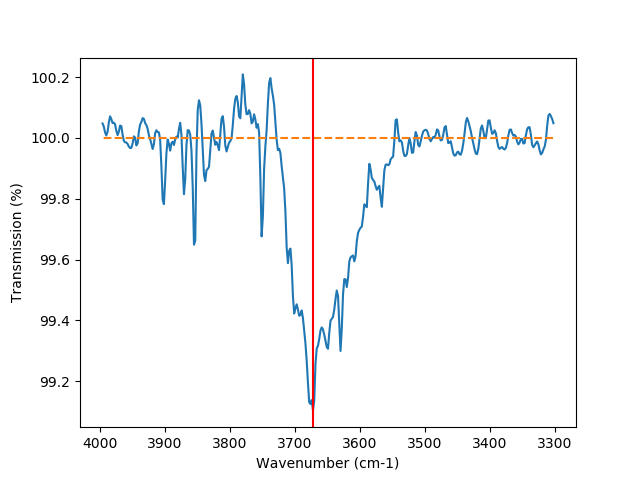

T_min = 99.104%


In [50]:
# Normalise baseline
delta = 100 - ynew

# Plot
fig, ax1 = plt.subplots()
ax1.plot(x, y + delta, label=f)
ax1.plot(x, ynew + delta, '--', label='Cubic Spline')
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.axvline(x[loc], color='r')

t_min = y[loc] + delta[loc]
print('T_min = {:.3f}%'.format(t_min))

In [ ]:
t_max

In [ ]:
# Thickness of samples (cm)
d = 0.11 

# MISC

C:\Users\mn14tm\AppData\Local\Continuum\Miniconda3\lib\site-packages\scipy\interpolate\fitpack2.py:258: UserWarning: smoothing factor unchanged forLSQ spline with fixed knots
  warnings.warn('smoothing factor unchanged for'


<IPython.core.display.Javascript object>


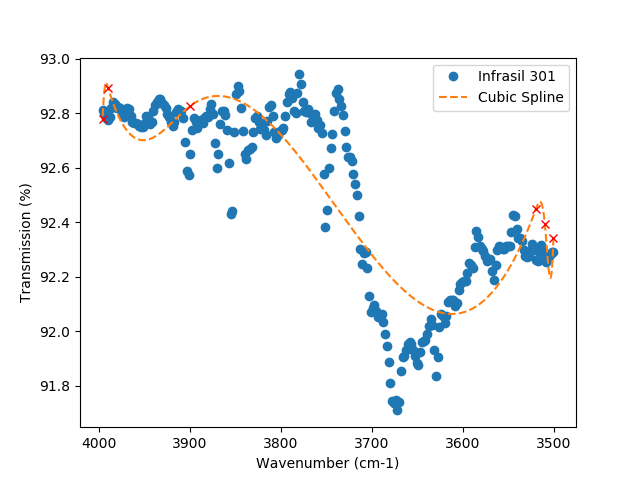

(4021.0347195000004, 3475.7933304999997)

In [49]:
ind = np.where(x>3500)
x = x[ind]
y = y[ind]

from scipy import interpolate

t = [3510, 3520, 3900, 3990]
s = interpolate.LSQUnivariateSpline(x, y, t, k=3)
s.set_smoothing_factor(0.5)

xnew = np.arange(min(x), max(x), 0.1)
ynew = s(xnew)

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'o', label=f)
ax1.plot(xnew, ynew, '--', label='Cubic Spline')

ax1.plot(s.get_knots(), s(s.get_knots()), 'rx')
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')

ax1.set_xlim(ax1.get_xlim()[::-1])